In [64]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [66]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [67]:
df.shape

(1000, 2)

In [68]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [69]:
# check imbalance dataset
df.Liked.value_counts()

0    500
1    500
Name: Liked, dtype: int64

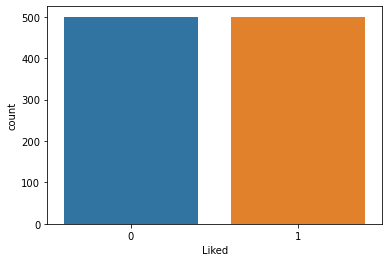

In [70]:
# vizulaization of target classes
sns.countplot(x = 'Liked', data = df)
plt.show()

In [71]:
# Tokenize sentences
# Remove capital letters
# Remove stopwords
# Remove non-alphanumeric characters
# Lemmatize the tokens
def clean(text):
    wn = WordNetLemmatizer()
    stopword = stopwords.words('english')
    tokens = word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

In [72]:
df['clean']=df['Review'].map(clean)

In [73]:
df['clean']

0                                    [wow, loved, place]
1                                          [crust, good]
2                                [tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                        [selection, menu, great, price]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997                [overall, impressed, would, go, back]
998    [whole, experience, underwhelming, think, go, ...
999    [wasted, enough, life, poured, salt, wound, dr...
Name: clean, Length: 1000, dtype: object

In [74]:
df['clean_text']=df['clean'].apply(lambda x: " ".join([str(word) for word in x]))

In [75]:
df['clean_text']

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                      overall impressed would go back
998    whole experience underwhelming think go ninja ...
999    wasted enough life poured salt wound drawing t...
Name: clean_text, Length: 1000, dtype: object

# Generating Word Cloud

In [76]:
positive_words=" ".join(df[df.Liked==1]['clean_text'].values)
negative_words=" ".join(df[df.Liked==0]['clean_text'].values)

In [77]:
corpus = [positive_words +negative_words]

In [78]:
from wordcloud import WordCloud

In [79]:
def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=75, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=40)
    plt.imshow(wc.recolor(colormap='Dark2', random_state=17), alpha=0.98)
    plt.axis('off')

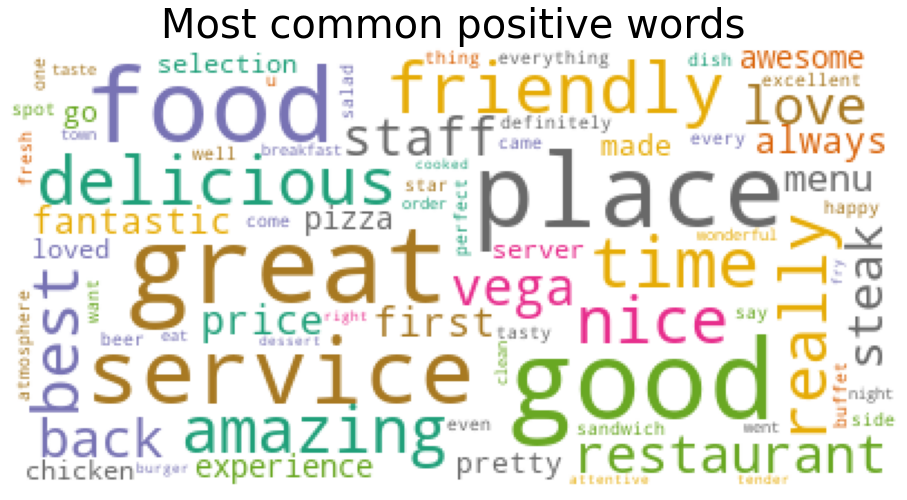

In [80]:
generate_wordcloud(positive_words,"positive")

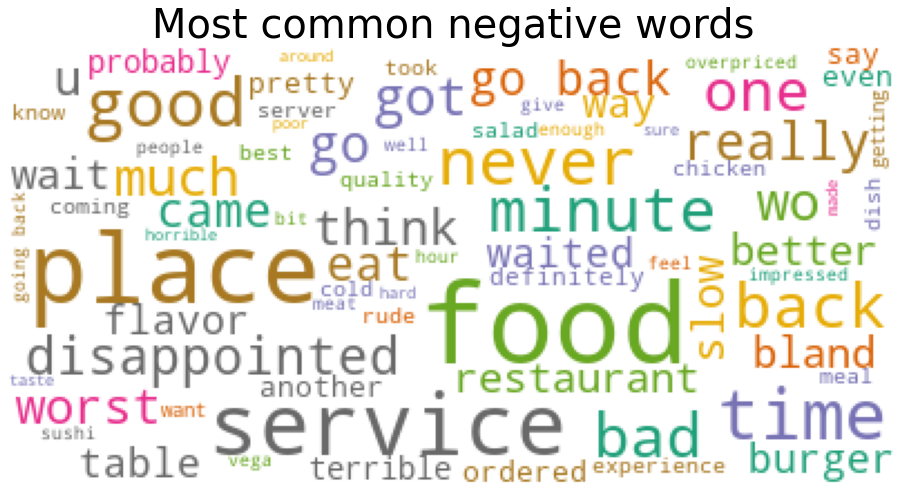

In [81]:
generate_wordcloud(negative_words,"negative")

# Splitting data into Test and Train

In [82]:
# Split the data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['clean_text'],df['Liked'], random_state = 101, test_size = .30)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(700,)
(300,)
(300,)
(700,)


In [83]:
x_train

290    waited hour never got either pizza many around...
167                                 go looking good food
486    toro tartare cavier extraordinary liked thinly...
683                                      good food great
876                           better bagel grocery store
                             ...                        
575                pizza tasted old super chewy good way
838            food way overpriced portion fucking small
337    burger got gold standard burger kind disappointed
523                                first time might last
863                                        love fry bean
Name: clean_text, Length: 700, dtype: object

In [84]:
y_train

290    0
167    0
486    1
683    1
876    0
      ..
575    0
838    0
337    0
523    0
863    1
Name: Liked, Length: 700, dtype: int64

# TFID 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_x=x_train  
df_y=y_train 
tf = TfidfVectorizer()   
df_xcv = tf.fit_transform(df_x)  
a=df_xcv.toarray()  
words = tf.get_feature_names() 

In [132]:
words

['00',
 '10',
 '100',
 '11',
 '12',
 '15',
 '17',
 '1979',
 '2007',
 '30',
 '35',
 '40',
 '40min',
 '45',
 '70',
 '85',
 '90',
 '99',
 'about',
 'above',
 'absolutely',
 'absolutley',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledged',
 'actual',
 'affordable',
 'after',
 'afternoon',
 'again',
 'ago',
 'airport',
 'ala',
 'albondigas',
 'all',
 'almost',
 'alone',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'ambiance',
 'ambience',
 'amount',
 'an',
 'and',
 'angry',
 'another',
 'any',
 'anything',
 'anytime',
 'anyway',
 'apart',
 'apologize',
 'apology',
 'app',
 'appalling',
 'appealing',
 'appetizer',
 'appetizers',
 'apple',
 'approval',
 'are',
 'area',
 'aria',
 'around',
 'array',
 'arrived',
 'arrives',
 'arriving',
 'as',
 'ask',
 'asked',
 'assure',
 'at',
 'ate',
 'atmosphere',
 'attached',
 'attack',
 'attention',
 'attentive',
 'attitudes',
 'authentic',
 'average',
 'avocado',
 'avoid',
 'avoided',
 'away',
 'awesome',
 'awful',
 'baba',
 '

In [23]:
x_tfidf_df = pd.DataFrame(a)
x_tfidf_df.columns = words
x_tfidf_df

,00,10,100,11,12,15,17,1979,2007,30,...,years,yellow,yellowtail,yelpers,yet,you,your,yourself,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.269246,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
696,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
697,0.0,0.0,0.0,0.0,0.0,0.0,0.350203,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
698,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Build Classification Model

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfid_model = TfidfVectorizer()
# Machine Learning Algorthim
from sklearn.ensemble import RandomForestClassifier
# pipeline package to apply and merge NLP and ML together to get the output
from sklearn.pipeline import Pipeline

In [88]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('random_forest', RandomForestClassifier())])

In [89]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('random_forest', RandomForestClassifier())])

In [91]:
y_predict_test = classifier.predict(x_test)

In [93]:
y_predict_train = classifier.predict(x_train)

In [94]:
print(y_test, y_predict_test)

545    1
298    0
109    1
837    0
194    0
      ..
847    1
682    1
884    0
325    1
482    0
Name: Liked, Length: 300, dtype: int64 [1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0
 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1
 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 0 0 1]


In [95]:
print(y_train, y_predict_train)

290    0
167    0
486    1
683    1
876    0
      ..
575    0
838    0
337    0
523    0
863    1
Name: Liked, Length: 700, dtype: int64 [0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1
 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [97]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [98]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       150
           1       0.81      0.73      0.77       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [99]:
print(confusion_matrix(y_train, y_predict_train))

[[349   1]
 [  1 349]]


In [101]:
print(confusion_matrix(y_test, y_predict_test))

[[125  25]
 [ 41 109]]


In [36]:
print(accuracy_score(y_train, y_predict_train))

1.0


In [102]:
print(accuracy_score(y_test, y_predict_test))

0.78


In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
accuracy = cross_val_score(classifier,x_test, y_test,cv=10)

In [109]:
accuracy

array([0.8       , 0.66666667, 0.73333333, 0.7       , 0.53333333,
       0.66666667, 0.73333333, 0.66666667, 0.7       , 0.8       ])

In [111]:
accuracy[0]

0.8

# Grid Search to find best parameter

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [128]:
param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'n_estimators': [1, 50,100, 150,200],
              'criterion': ['gini', 'entropy']}

In [133]:
rfc = RandomForestClassifier()
gr = GridSearchCV(rfc, param_dist, cv = 10, scoring='accuracy')
gr.fit(x_tfidf_df, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [1, 50, 100, 150, 200]},
             scoring='accuracy')

In [134]:
print(gr.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 150}


# Fitting Models as per best params

In [139]:
classifier_new = Pipeline([('tfidf', TfidfVectorizer()), ('random_forest', RandomForestClassifier(criterion='entropy',max_depth = 3,max_features= 'auto', n_estimators= 150 ))])

In [142]:
classifier_new.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', max_depth=3,
                                        max_features='auto',
                                        n_estimators=150))])

In [143]:
y_predict_test_new = classifier_new.predict(x_test)

In [144]:
y_predict_train_new = classifier_new.predict(x_train)

In [145]:
print(classification_report(y_train, y_predict_train_new))
print('*****'*30)
print(classification_report(y_test, y_predict_test_new))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       350
           1       0.90      0.72      0.80       350

    accuracy                           0.82       700
   macro avg       0.83      0.82      0.82       700
weighted avg       0.83      0.82      0.82       700

******************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       150
           1       0.75      0.68      0.71       150

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

